In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Q:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Loading data...
17465344/17464789 [==============================] - 10s 1us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [14]:
from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.6012 - acc: 0.6565 - val_loss: 0.4024 - val_acc: 0.8346
Epoch 2/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.3611 - acc: 0.8497 - val_loss: 0.4847 - val_acc: 0.7632
Epoch 3/10
20000/20000 [==============================] - 58s 3ms/step - loss: 0.2670 - acc: 0.8948 - val_loss: 0.4508 - val_acc: 0.7902
Epoch 4/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.1826 - acc: 0.9330 - val_loss: 0.4177 - val_acc: 0.8336
Epoch 5/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1173 - acc: 0.9573 - val_loss: 0.6506 - val_acc: 0.8394
Epoch 6/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.0573 - acc: 0.9806 - val_loss: 0.5768 - val_acc: 0.8458
Epoch 7/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.0328 - acc: 0.9891 - val_loss: 1.1559 - val_acc:

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## LSTM

In [15]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])
history = model.fit(input_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.5342 - acc: 0.7427 - val_loss: 0.3793 - val_acc: 0.8382
Epoch 2/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.3073 - acc: 0.8773 - val_loss: 0.3827 - val_acc: 0.8342
Epoch 3/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.2358 - acc: 0.9107 - val_loss: 0.2984 - val_acc: 0.8828
Epoch 4/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.2015 - acc: 0.9245 - val_loss: 0.3010 - val_acc: 0.8922
Epoch 5/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.1817 - acc: 0.9335 - val_loss: 0.3167 - val_acc: 0.8662
Epoch 6/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.1662 - acc: 0.9386 - val_loss: 0.3415 - val_acc: 0.8888
Epoch 7/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.1458 - acc: 0.9469 - val_loss: 0.3229 - val_acc:

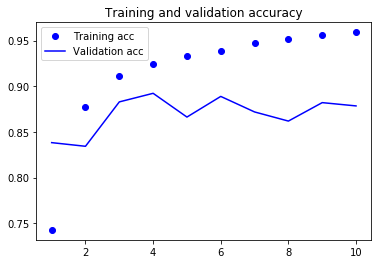

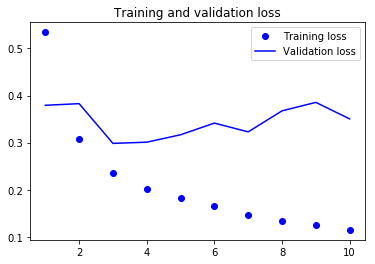

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()